# **Homework Assignment: EM Clustering in 2D**

Dominik Gaweł

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dg7s/Machine-Learning/blob/main/hw/EM_Clustering_in_2D.ipynb)
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

In [2]:
# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

## **Primary Question**


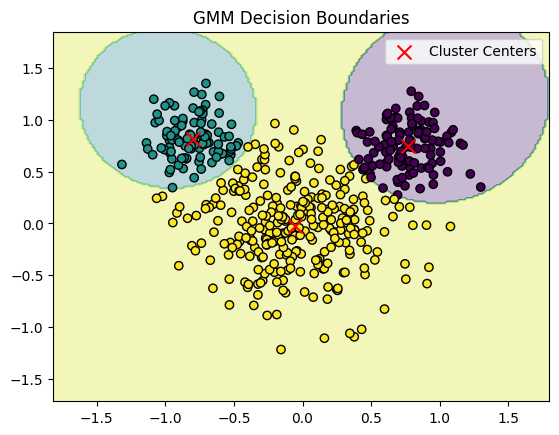

In [4]:
# Meshgrid to cover the plot area
x_min, x_max = data_X[:, 0].min() - 0.5, data_X[:, 0].max() + 0.5
y_min, y_max = data_X[:, 1].min() - 0.5, data_X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)

# Cluster assignments
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), cmap='viridis', edgecolors='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.legend()
plt.title("GMM Decision Boundaries")
plt.show()

On the above plot we can see some points that are on the boundary of their clusters or even seem to belong to another cluster. Because the multivariate Gaussian density is strictly positive everywhere, there is always a nonzero probability that a point assigned to one cluster may actually be generated by a different component of the mixture, especially near the cluster boundaries. However, in our case there are just a few such points and all of them are near boundaries. Therefore, this does not indicate an error in our solution.

## **Secondary Question**


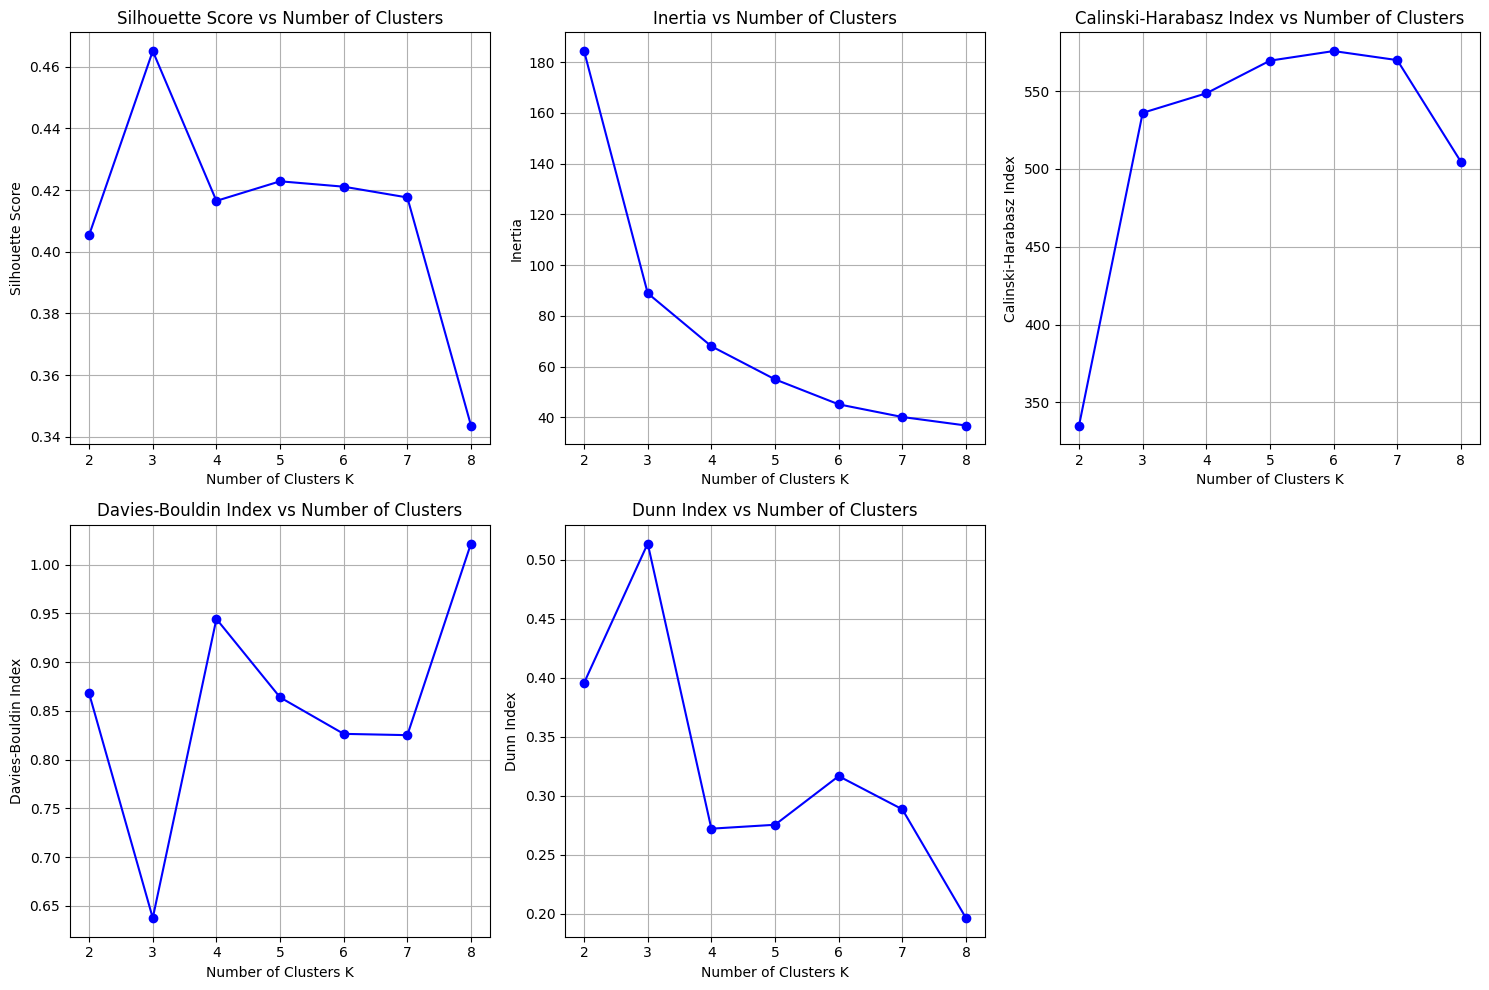

In [ ]:
Ks = range(2, 9)
metrics = {
    "Silhouette Score": [],
    "Inertia": [],
    "Calinski-Harabasz Index": [],
    "Davies-Bouldin Index": [],
    "Dunn Index": []
}

def dunn_index(data, labels, centers):
    clusters = [data[labels == i] for i in range(len(centers))]
    min_intercluster_dist = min([np.linalg.norm(c1 - c2) for i, c1 in enumerate(centers) for j, c2 in enumerate(centers) if i < j])
    max_intracluster_dist = max([np.max(cdist(cluster, cluster)) for cluster in clusters])
    return min_intercluster_dist / max_intracluster_dist

for K in Ks:
    gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=42)
    gmm.fit(data_X)
    labels = gmm.predict(data_X)
    metrics["Silhouette Score"].append(silhouette_score(data_X, labels))
    metrics["Inertia"].append(np.sum(np.min(cdist(data_X, gmm.means_, metric='euclidean')**2, axis=1)))
    metrics["Calinski-Harabasz Index"].append(calinski_harabasz_score(data_X, labels))
    metrics["Davies-Bouldin Index"].append(davies_bouldin_score(data_X, labels))
    metrics["Dunn Index"].append(dunn_index(data_X, labels, gmm.means_))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (metric_name, values) in enumerate(metrics.items()):
    axes[i].plot(Ks, values, marker='o', linestyle='-', color='b')
    axes[i].set_xlabel("Number of Clusters K")
    axes[i].set_ylabel(metric_name)
    axes[i].set_title(f"{metric_name} vs Number of Clusters")
    axes[i].grid()

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Deciding on the Optimal Number of Clusters

We can choose the best $K$ by fitting the clustering algorithm for a range of $K$ values and comparing key evaluation metrics.

- **Silhouette Score (Higher is Better):** Indicates how similar points are to their own cluster compared to others.
- **Inertia (Lower is Better):** Sums the squared distances to the nearest centroid; look for an "elbow" where adding more clusters doesn't significantly reduce inertia.
- **Calinski–Harabasz Index (Higher is Better):** Reflects the ratio of between-cluster dispersion to within-cluster dispersion.
- **Davies–Bouldin Index (Lower is Better):** Measures the average similarity between clusters; lower values suggest better separation.
- **Dunn Index (Higher is Better):** Compares the smallest distance between clusters to the largest intra-cluster distance, favoring well-separated, compact clusters.

The best choice seems to be $K=3$, as expected.


For curiosity, we will plot the GMM decision boundaries for `n_components=8`.

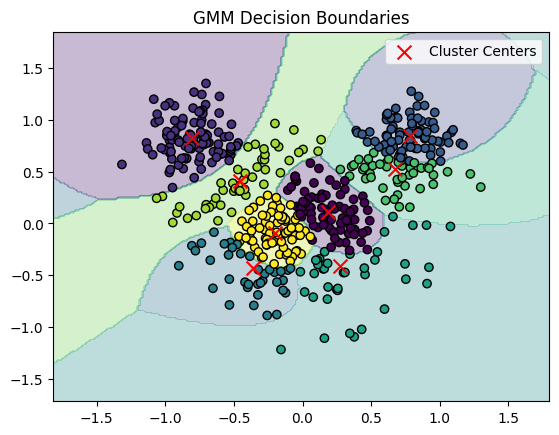

In [6]:
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=42)
gmm.fit(data_X)

# Cluster assignments
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), cmap='viridis', edgecolors='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.legend()
plt.title("GMM Decision Boundaries")
plt.show()